In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay 

In [67]:
DataFrame=pd.read_csv("Banknote_Authentication.csv",delimiter=";")
DataFrame.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


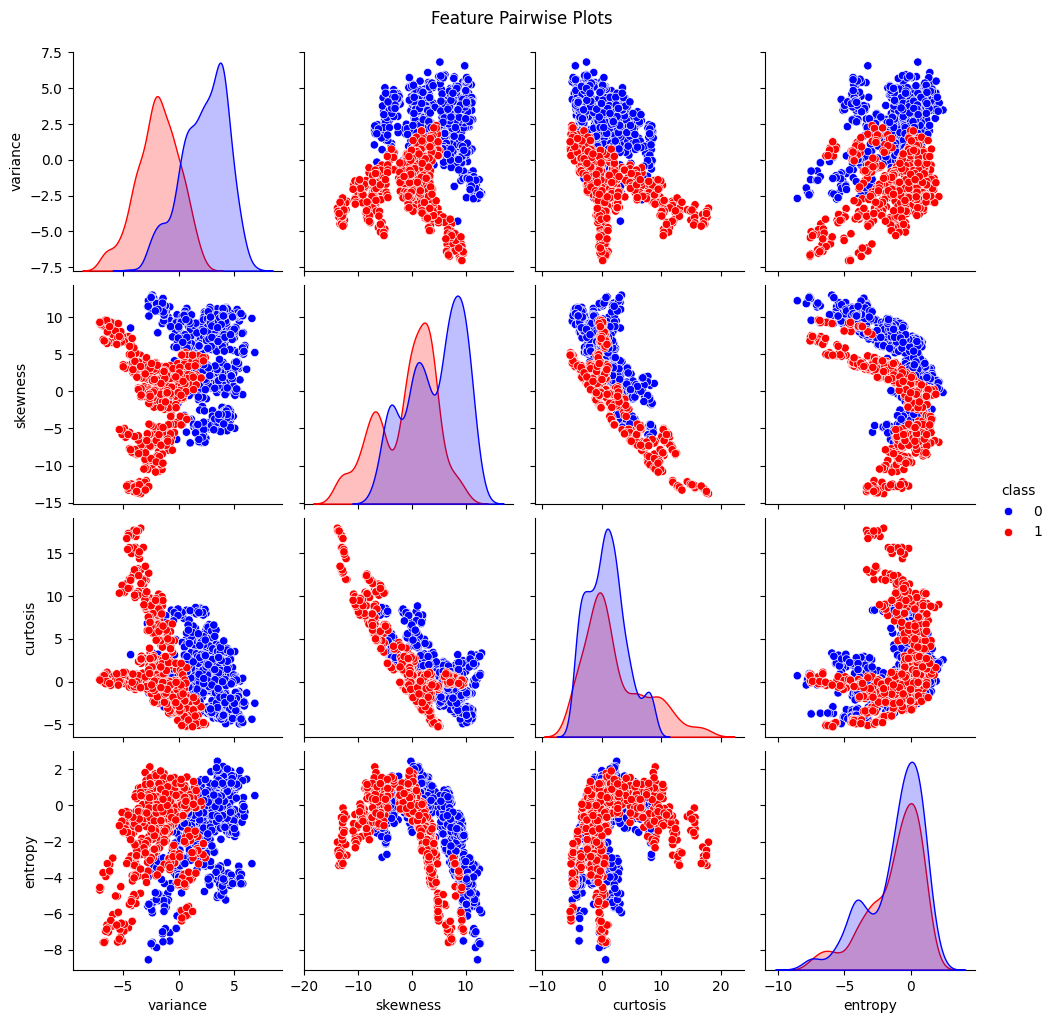

In [68]:
g=sns.pairplot(DataFrame, hue="class",palette={1:'red',0:'blue'})
plt.suptitle("Feature Pairwise Plots", y=1.02)
g.fig.savefig("pairplot_output.png", dpi=300, bbox_inches='tight')
plt.show()

In [69]:
#Features and Class
X=DataFrame.drop('class',axis=1)
Y=DataFrame['class']


In [70]:
#Splitting the Data
X_train ,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



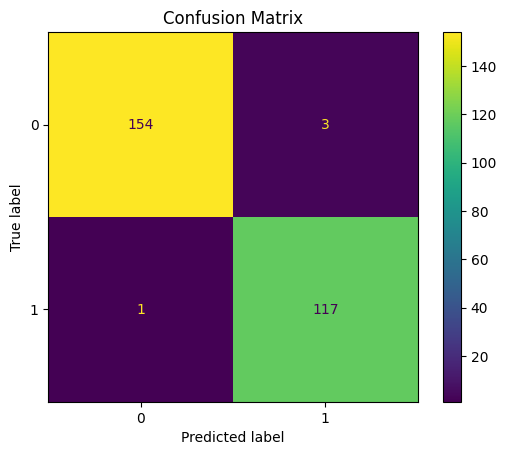

In [71]:
GridSearchCV_parameters = {
    'max_depth': [2,3, 4, 5,6,7],
    'min_samples_split': [2, 5, 10, 15,20,25,50],
    'criterion': ['gini', 'entropy']
}

model = DecisionTreeClassifier(random_state=42)

Grid = GridSearchCV(
    estimator=model,
    param_grid=GridSearchCV_parameters,
    cv=5,                      
    scoring='accuracy',        
    n_jobs=-1,                 
    verbose=1
)

Grid.fit(X_train, Y_train)

best_model = Grid.best_estimator_

y_pred = best_model.predict(X_test)
print("Best Parameters:", Grid.best_params_)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, Y_test)
plt.title("Confusion Matrix")
plt.show()

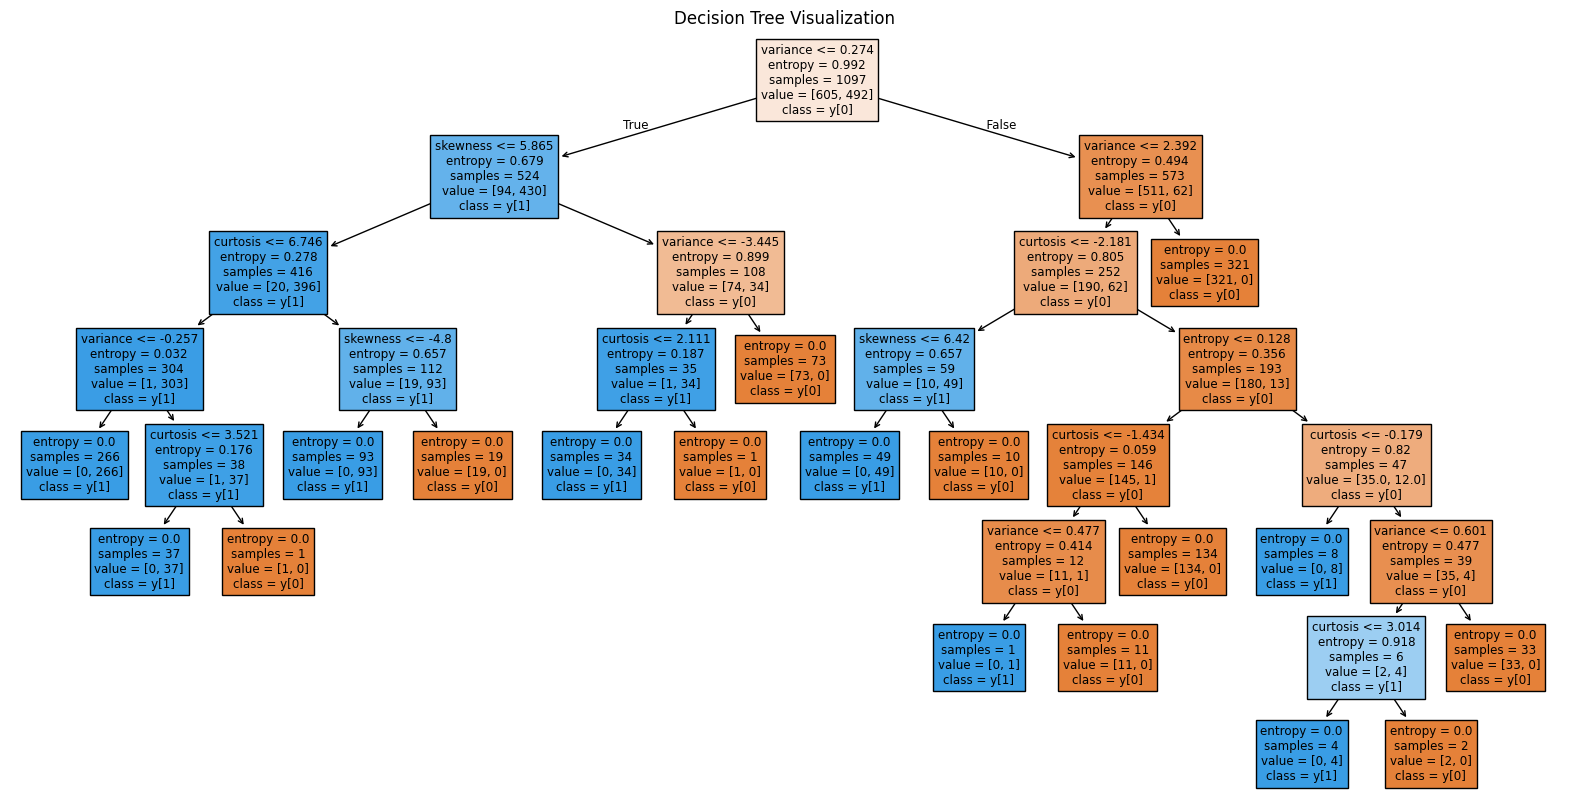

In [72]:
best_model.fit(X_train, Y_train)

plt.figure(figsize=(20, 10))  # Adjust size as needed
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=True)
plt.title("Decision Tree Visualization")
plt.show()

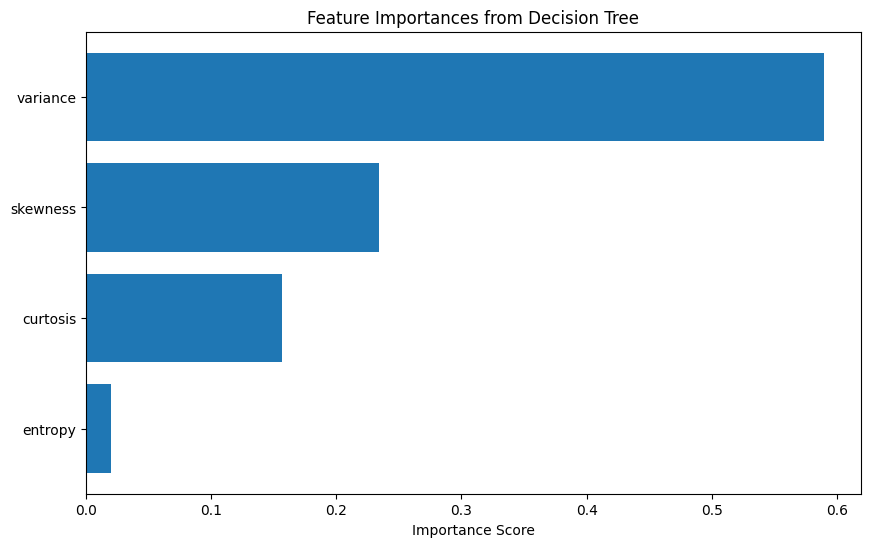

In [73]:
importances = best_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importances from Decision Tree')
plt.gca().invert_yaxis()  # Most important at the top
plt.show()
